<a href="https://colab.research.google.com/github/metamatematico/hello-world/blob/master/Copia_de_Reto_01_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para redes neuronales

# Importar librerias

In [15]:
import numpy as np     # Principal libreria para el manejo de operaciones matematicas
import matplotlib.pyplot as plt  # Libreria para el manejo de graficas

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model   # Libreria para generar modelos de ML
from keras.optimizers import Adam  # Utilizar optimizadores en la red
from keras.utils import to_categorical

from keras.datasets import cifar10  # Libreria con algunos dataset muy utilizados en ML

# Colectar los datos

In [4]:
NUM_CLASSES = 10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # Funcion para cargar los datos de la libreria

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0   #   Dividir el valor entre un numero flotante

y_train = to_categorical(y_train, NUM_CLASSES)   # Se debe utilizar una codificacion del tip one hot
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
x_train[1, 12, 13, 2]   # Verificar que este valor sea entre 0 y 1, y que sea flotante

0.59607846

# Arquitectura de la red

In [8]:
input_layer = Input((32,32,3))   # Definir el tamaño de entrada de la red, esta se define por el tipo de dataset a usar

x = Flatten()(input_layer)    # La entrada no puede utilizarse en forma matricial, debe ser un vector plano

x = Dense(200, activation = 'relu')(x)    # uso de capas perceptron
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(10, activation = 'softmax')(x) # Definir la salida

model = Model(input_layer, output_layer)

In [9]:
model.summary()  # Observar la construccion del modelo final

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento

In [11]:
opt = Adam(lr=0.0005)   # Confgurar el optimizador
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  # Compilar el modelo

In [21]:
model.fit(x_train      # Entrenar el modelo
          , y_train
          , batch_size=32
          , epochs=100
          , shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9806 - accuracy: 0.6506
Epoch 2/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9795 - accuracy: 0.6480
Epoch 3/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9763 - accuracy: 0.6518
Epoch 4/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9722 - accuracy: 0.6545
Epoch 5/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9695 - accuracy: 0.6535
Epoch 6/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9617 - accuracy: 0.6553
Epoch 7/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9575 - accuracy: 0.6594
Epoch 8/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9543 - accuracy: 0.6607
Epoch 9/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9543 - accuracy: 0.6586
Epoch 10/100
1563/1563 [==============================] - 4s 2ms/step - l

# Analisis

In [22]:
model.evaluate(x_test, y_test)  # El modelo se puede evaluar con el set de prueba

313/313 [==============================] - 1s 2ms/step - loss: 2.0909 - accuracy: 0.4769


[2.0909104347229004, 0.47690001130104065]

In [23]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)] # Datos predichos
actual_single = CLASSES[np.argmax(y_test, axis = -1)] # Datos reales

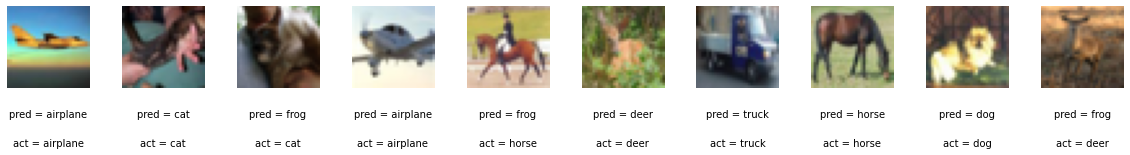

In [27]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
